In [17]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# 1. Preprocessing

# import the data and convert it to dataframe

In [18]:
df= read_csv("hepatitis.data",names=("Class","AGE","SEX","STEROID","ANTIVIRALS" ,"FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM",
"SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"))
df = df.replace('?',np.nan)

In [19]:
df.head().transpose()

,0,1,2,3,4
Class,2,2,2,2,2
AGE,30,50,78,31,34
SEX,2,1,1,1,1
STEROID,1,1,2,NaN,2
ANTIVIRALS,2,2,2,1,2
FATIGUE,2,1,1,2,2
MALAISE,2,2,2,2,2
ANOREXIA,2,2,2,2,2
LIVER BIG,1,1,2,2,2
LIVER FIRM,2,2,2,2,2


In [20]:
df.shape

(155, 20)

In [21]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER BIG        145 non-null    object
 9   LIVER FIRM       144 non-null    object
 10  SPLEEN PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [22]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

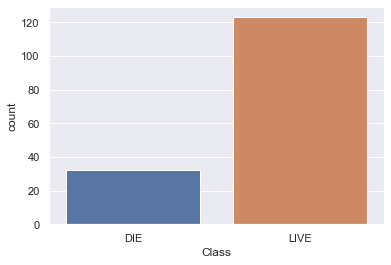

In [23]:
sns.set()
df["Class"] = df["Class"].astype(int)
class_count=sns.countplot(x="Class", data=df)
plt.gca().set_xticklabels(['DIE','LIVE']);

class_count.figure.savefig('class.png')

# get the numeric columns and fill the missing values

In [26]:
df['BILIRUBIN']=pd.to_numeric(df['BILIRUBIN'],errors='coerce').astype('float64')
df['BILIRUBIN']=df['BILIRUBIN'].fillna(df['BILIRUBIN'].mean())

df["ALK PHOSPHATE"]=pd.to_numeric(df["ALK PHOSPHATE"],errors='coerce').astype('float64')
df["ALK PHOSPHATE"]=df["ALK PHOSPHATE"].fillna(df["ALK PHOSPHATE"].mean())

df["SGOT"]=pd.to_numeric(df["SGOT"],errors='coerce').astype('float64')
df["SGOT"]=df["SGOT"].fillna(df["SGOT"].mean())

df["ALBUMIN"]=pd.to_numeric(df["ALBUMIN"],errors='coerce').astype('float64')
df["ALBUMIN"]=df["ALBUMIN"].fillna(df["ALBUMIN"].mean())

df["PROTIME"]=pd.to_numeric(df["PROTIME"],errors='coerce').astype('float64')
df["PROTIME"]=df["PROTIME"].fillna(df["PROTIME"].mean())

# get categorical columns and fill the missing values

In [28]:
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

# Standardization

In [29]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop("Class", axis=1)),columns = (df.drop("Class", axis=1)).columns)

# 2. Feature Selection

In [30]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif,k=10)

In [31]:
X_selected = fs.fit_transform(df_scaled, df["Class"])

In [32]:
np.sort(fs.scores_)[::-1]

array([43.2228739 , 42.40105298, 38.95130739, 27.30281418, 23.12984208,
       19.93617335, 19.71483264, 15.94789629, 15.8119497 ,  8.88387097,
        7.75564648,  4.72330419,  3.10369914,  2.94460819,  2.78213996,
        2.6382112 ,  1.35415849,  0.87898099,  0.06157202])

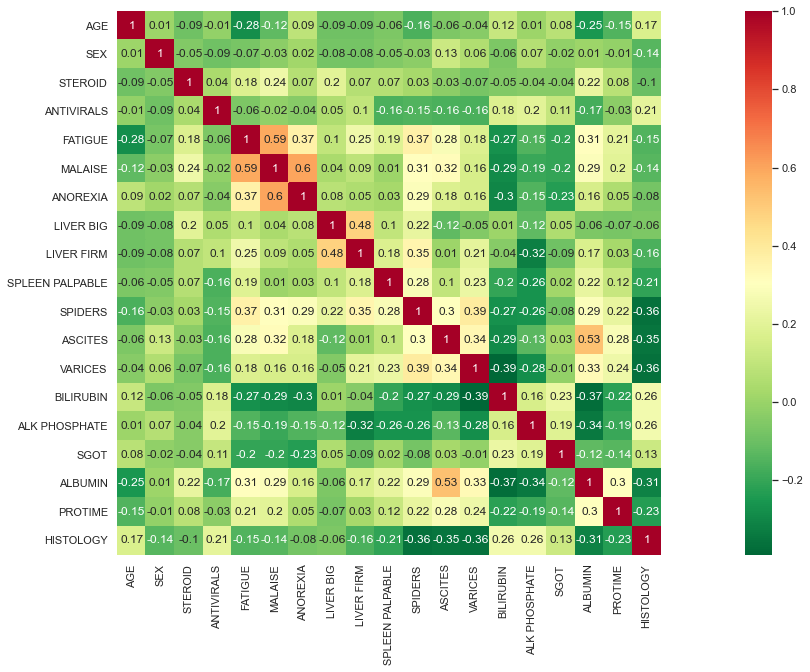

In [65]:
correlation = df_scaled.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

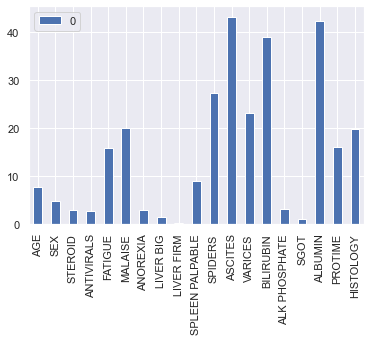

In [33]:
X = np.arange(19)
d = pd.DataFrame(fs.scores_, index =["AGE","SEX","STEROID","ANTIVIRALS" ,"FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM",
"SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"])
d.plot.bar()

plt.show()

# KFold Train, Test and Validation

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


In [36]:
cv = KFold(n_splits=5, shuffle=True)

# KNN

In [37]:
accuracy = []    
precision = []   
recall = []      
f1score = []    


for i in range(31):
    accuracy.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score))) 
    recall.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score))) 
    f1score.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score))) 

In [38]:
X11= np.max(accuracy)
X12= np.min(accuracy)
X13= np.std(accuracy)
X14= np.mean(accuracy)

In [39]:
Y11= np.max(precision)
Y12= np.min(precision)
Y13= np.std(precision)
Y14= np.mean(precision)

In [40]:
Z11= np.max(recall)
Z12= np.min(recall)
Z13= np.std(recall)
Z14= np.mean(recall)

In [41]:
F11= np.max(f1score)
F12= np.min(f1score)
F13= np.std(f1score)
F14= np.mean(f1score)

# SVM

In [42]:
accuracy = []    
precision = []   
recall = []      
f1score = []    

for i in range(31):
    accuracy.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score))) 
    recall.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score))) 
    f1score.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score))) 

In [43]:
X21= np.max(accuracy)
X22= np.min(accuracy)
X23= np.std(accuracy)
X24= np.mean(accuracy)

In [44]:
Y21= np.max(precision)
Y22= np.min(precision)
Y23= np.std(precision)
Y24= np.mean(precision)

In [45]:
Z21= np.max(recall)
Z22= np.min(recall)
Z23= np.std(recall)
Z24= np.mean(recall)

In [46]:
F21= np.max(f1score)
F22= np.min(f1score)
F23= np.std(f1score)
F24= np.mean(f1score)

# Bayes

In [47]:
accuracy = []    
precision = []   
recall = []      
f1score = []    


for i in range(31):
    accuracy.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score))) 
    recall.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score))) 
    f1score.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score))) 

In [48]:
X31= np.max(accuracy)
X32= np.min(accuracy)
X33= np.std(accuracy)
X34= np.mean(accuracy)

In [49]:
Y31= np.max(precision)
Y32= np.min(precision)
Y33= np.std(precision)
Y34= np.mean(precision)

In [50]:
Z31= np.max(recall)
Z32= np.min(recall)
Z33= np.std(recall)
Z34= np.mean(recall)

In [51]:
F31= np.max(f1score)
F32= np.min(f1score)
F33= np.std(f1score)
F34= np.mean(f1score)

# Arbre de decision

In [52]:
accuracy = []    
precision = []   
recall = []     
f1score = []    


for i in range(31):
    accuracy.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score))) 
    recall.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score))) 
    f1score.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score))) 

In [53]:
X41= np.max(accuracy)
X42= np.min(accuracy)
X43= np.std(accuracy)
X44= np.mean(accuracy)

In [54]:
Y41= np.max(precision)
Y42= np.min(precision)
Y43= np.std(precision)
Y44= np.mean(precision)

In [55]:
Z41= np.max(recall)
Z42= np.min(recall)
Z43= np.std(recall)
Z44= np.mean(recall)

In [56]:
F41= np.max(f1score)
F42= np.min(f1score)
F43= np.std(f1score)
F44= np.mean(f1score)

In [57]:

path = r"C:\Users\MAXFRAME\Desktop\Classification\data_hepatitis_classi.xlsx"

dami={'KNN':[X11,X12,X13,X14,Y11,Y12,Y13,Y14,Z11,Z12,Z13,Z14,F11,F12,F13,F14],'ARBRE DE DECISION':[X41,X42,X43,X44,Y41,Y42,Y43,Y44,Z41,Z42,Z43,Z44,F41,F42,F43,F44],'BAYES':[X31,X32,X33,X34,Y31,Y32,Y33,Y34,Z31,Z32,Z33,Z34,F31,F32,F33,F34],'SVM':[X21,X22,X23,X24,Y21,Y22,Y23,Y24,Z21,Z22,Z23,Z24,F21,F22,F23,F24]}
df1 = pd.DataFrame(dami,index=['Maximum (Accuracy)', 'Minimum (Accuracy)','Ecart type (Accuracy)', 'Moyenne (Accuracy)','Maximum (Precision)', 'Minimum (Precision)','Ecart type (Precision)', 'Moyenne (Precision)','Maximum (Recall)', 'Minimum (Recall)','Ecart type (Recall)', 'Moyenne (Recall)','Maximum (F1 score)', 'Minimum (F1 score)','Ecart type (F1 score)', 'Moyenne (F1 score)'])

writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
df1.to_excel(writer)

writer.save()
writer.close()